<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicModels/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning

## What is Deep Learning?
Deep Learning is a subset of machine learning that uses artificial neural networks with multiple layers (deep neural networks) to learn hierarchical representations of data. It has revolutionized many fields including computer vision, natural language processing, and more.

Key concepts we'll cover:
1. Neural Network Basics
2. Building Simple Neural Networks
3. Training and Evaluation
4. Different Types of Layers
5. Practical Example

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Neural Network Basics

A neural network consists of:
- Input Layer
- Hidden Layers
- Output Layer
- Activation Functions
- Weights and Biases

Let's visualize a simple neural network structure:

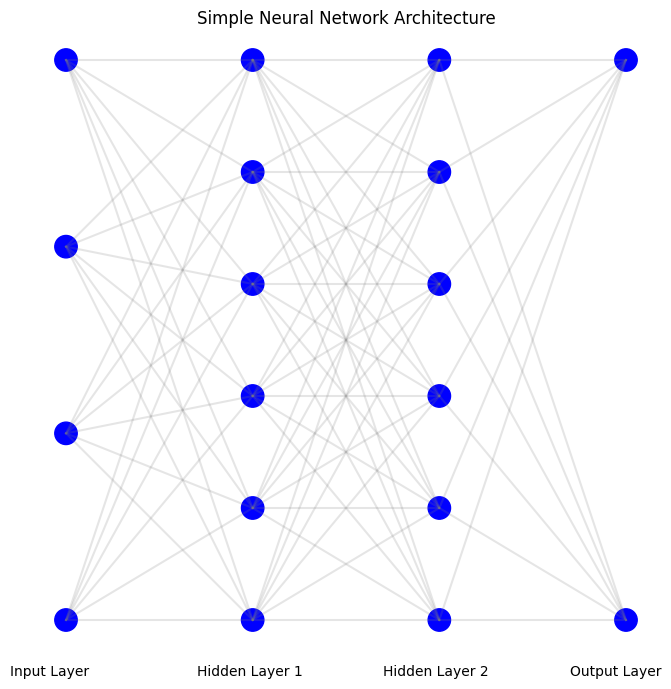

In [6]:
def plot_neural_network():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)

    # Layers
    layer_sizes = [4, 6, 6, 2]  # Example architecture
    layer_positions = np.linspace(0, 1, len(layer_sizes))

    # Plot nodes
    for i, (layer_size, layer_pos) in enumerate(zip(layer_sizes, layer_positions)):
        for j in range(layer_size):
            circle = plt.Circle((layer_pos, j/(layer_size-1)), 0.02, color='blue', fill=True)
            ax.add_artist(circle)

        # Add layer labels
        if i == 0:
            plt.text(layer_pos-0.1, -0.1, 'Input Layer')
        elif i == len(layer_sizes)-1:
            plt.text(layer_pos-0.1, -0.1, 'Output Layer')
        else:
            plt.text(layer_pos-0.1, -0.1, f'Hidden Layer {i}')

    # Plot connections
    for i in range(len(layer_sizes)-1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                ax.plot([layer_positions[i], layer_positions[i+1]],
                       [j/(layer_sizes[i]-1), k/(layer_sizes[i+1]-1)],
                       'gray', alpha=0.2)

    ax.set_aspect('equal')
    plt.axis('off')
    plt.title('Simple Neural Network Architecture')
    plt.show()

plot_neural_network()

## 2. Creating a Simple Neural Network

Let's create a simple neural network using TensorFlow/Keras to solve a binary classification problem:

In [7]:
# Generate synthetic data
np.random.seed(42)
n_samples = 1000

# Create two clusters of points
X1 = np.random.normal(0, 1, (n_samples//2, 2))
X2 = np.random.normal(3, 1, (n_samples//2, 2))
X = np.vstack([X1, X2])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network
def create_simple_model():
    model = models.Sequential([
        layers.Dense(16, activation='relu', input_shape=(2,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Create and train the model
model = create_simple_model()
history = model.fit(X_train_scaled, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4768 - loss: 0.8507 - val_accuracy: 0.4437 - val_loss: 0.7801
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4833 - loss: 0.7505 - val_accuracy: 0.4500 - val_loss: 0.6825
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5023 - loss: 0.6512 - val_accuracy: 0.5000 - val_loss: 0.5962
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6114 - loss: 0.5513 - val_accuracy: 0.7063 - val_loss: 0.5145
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8271 - loss: 0.4820 - val_accuracy: 0.9688 - val_loss: 0.4444
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9601 - loss: 0.4097 - val_accuracy: 0.9812 - val_loss: 0.3829
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9813 - loss: 0.3515 - val_accuracy: 0.9937 - val_loss: 0.3245
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9773 - loss: 0.2950 - val_accuracy: 0.9937 - val_loss: 0.270

## 3. Visualizing Training Progress

Let's analyze how our model learned over time:

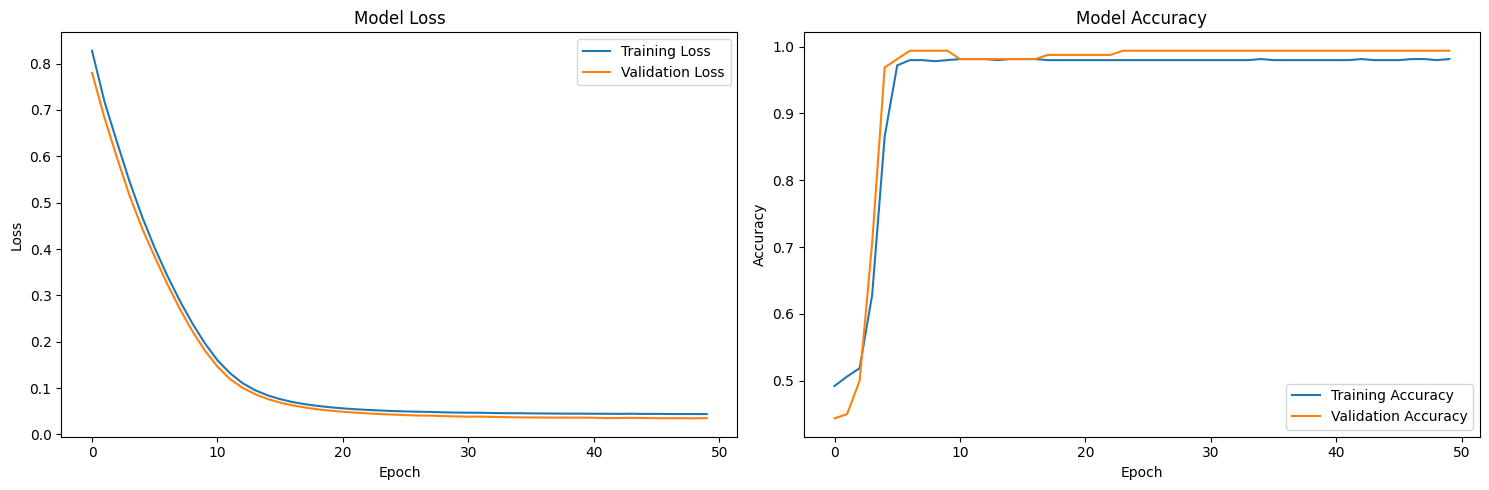

In [8]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

## 4. Visualizing Decision Boundaries

Let's see how our neural network separates the classes:def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    # Scale the mesh points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_scaled = scaler.transform(mesh_points)
    
    # Make predictions
    Z = model.predict(mesh_points_scaled)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title('Neural Network Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(model, X, y)

## 5. Different Types of Layers

Let's explore different types of layers commonly used in deep learning:

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7546 - loss: 0.5048 - val_accuracy: 0.9750 - val_loss: 0.5583
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9574 - loss: 0.2556 - val_accuracy: 0.9750 - val_loss: 0.4447
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9668 - loss: 0.1693 - val_accuracy: 0.9750 - val_loss: 0.3596
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9681 - loss: 0.1243 - val_accuracy: 0.9750 - val_loss: 0.2919
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9789 - loss: 0.0923 - val_accuracy: 0.9750 - val_loss: 0.2380
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9783 - loss: 0.0778 - val_accuracy: 0.9750 - val_loss: 0.1959
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9788 - loss: 0.0715 - val_accuracy: 0.9750 - val_loss: 0.1622
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9719 - loss: 0.0726 - val_accuracy: 0.9812 - val_l

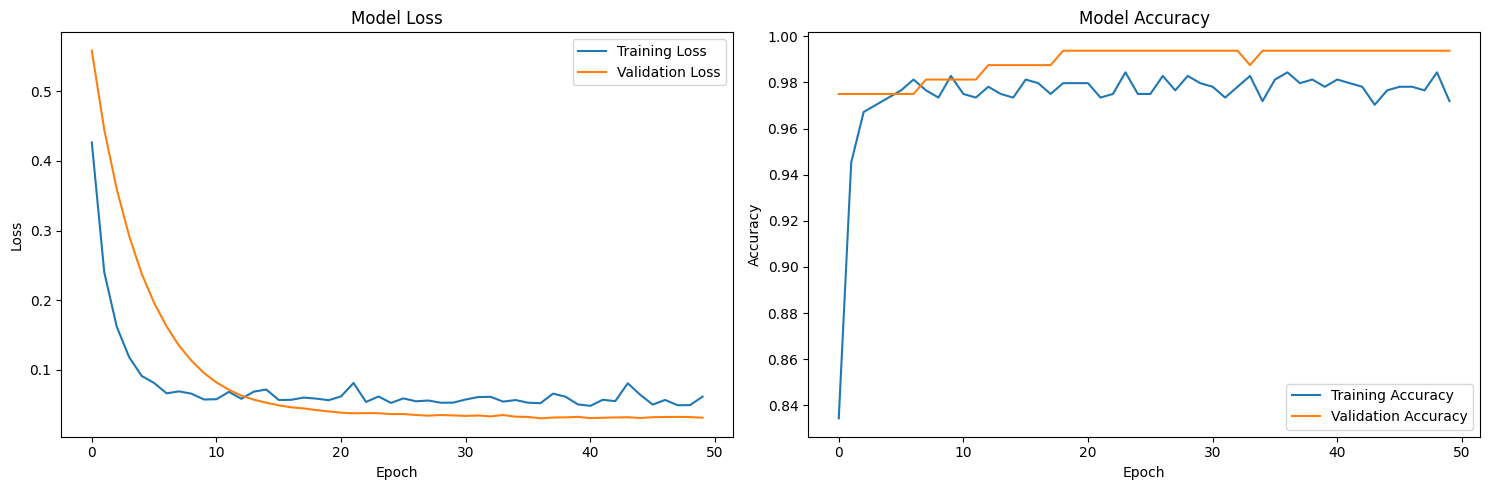

In [9]:
# Example of different layer types
def create_complex_model():
    model = models.Sequential([
        # Dense (Fully Connected) Layer
        layers.Dense(32, activation='relu', input_shape=(2,)),

        # Dropout Layer for regularization
        layers.Dropout(0.2),

        # Batch Normalization
        layers.BatchNormalization(),

        # Another Dense Layer
        layers.Dense(16, activation='relu'),

        # Output Layer
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Create and train the complex model
complex_model = create_complex_model()
complex_history = complex_model.fit(X_train_scaled, y_train,
                                  epochs=50,
                                  batch_size=32,
                                  validation_split=0.2,
                                  verbose=1)

# Compare performance
plot_training_history(complex_history)

## 6. Common Activation Functions

Let's visualize different activation functions:

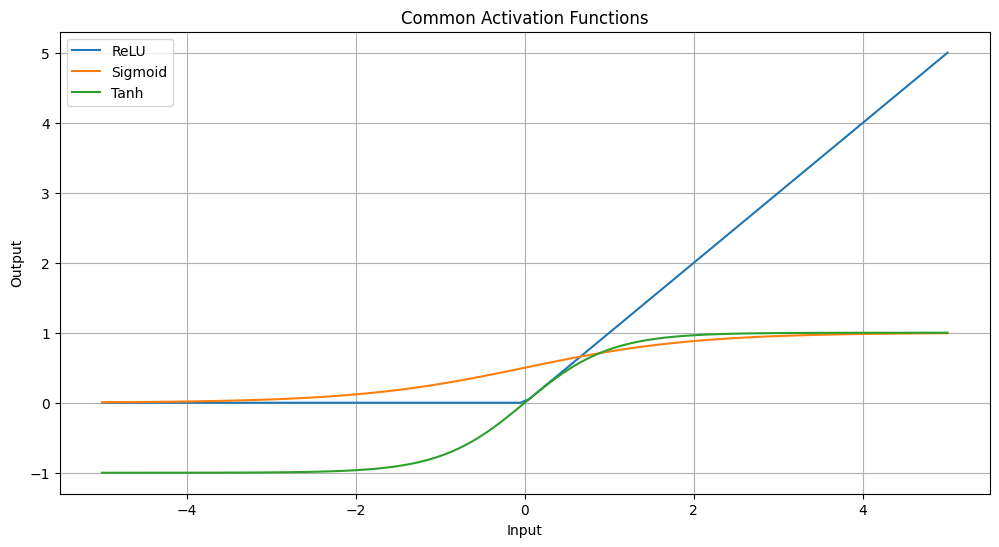

In [10]:
def plot_activation_functions():
    x = np.linspace(-5, 5, 100)

    # Define activation functions
    relu = np.maximum(0, x)
    sigmoid = 1 / (1 + np.exp(-x))
    tanh = np.tanh(x)

    plt.figure(figsize=(12, 6))
    plt.plot(x, relu, label='ReLU')
    plt.plot(x, sigmoid, label='Sigmoid')
    plt.plot(x, tanh, label='Tanh')
    plt.title('Common Activation Functions')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_activation_functions()

## 7. Practical Tips and Best Practices

### Model Architecture:
1. Start with a simple architecture
2. Add complexity gradually
3. Use appropriate activation functions
4. Consider regularization techniques

### Training:
1. Use appropriate batch size
2. Monitor training and validation metrics
3. Implement early stopping
4. Use learning rate scheduling

### Data Preparation:
1. Scale/normalize inputs
2. Handle missing values
3. Split data appropriately
4. Use data augmentation when applicable

### Common Issues:
1. Overfitting
2. Vanishing/Exploding gradients
3. Poor convergence
4. Long training times

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6618 - loss: 0.9020 - val_accuracy: 0.9750 - val_loss: 0.8585 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9194 - loss: 0.5667 - val_accuracy: 0.9312 - val_loss: 0.7889 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9516 - loss: 0.4717 - val_accuracy: 0.9125 - val_loss: 0.7317 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9752 - loss: 0.3859 - val_accuracy: 0.9125 - val_loss: 0.6787 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9766 - loss: 0.3606 - val_accuracy: 0.9375 - val_loss: 0.6279 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9595 - loss: 0.3434 - val_accuracy: 0.9500 - val_loss: 0.5864 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9757 - loss: 0.3087 - v

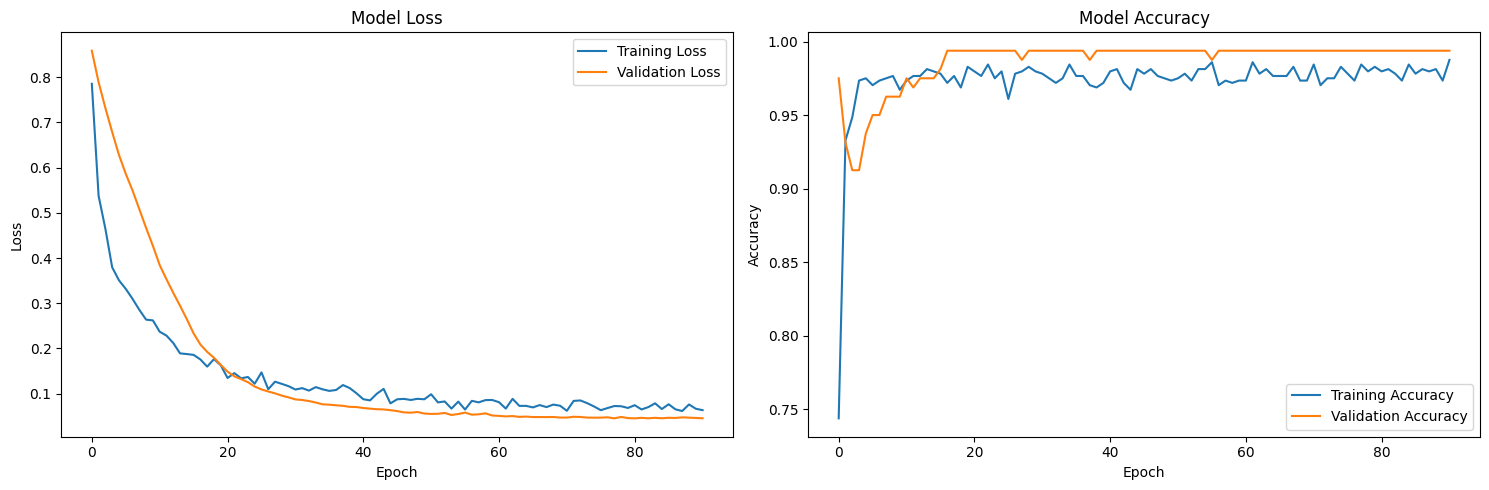

In [11]:
# Example of implementing some best practices
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create model with best practices
def create_optimized_model():
    model = models.Sequential([
        layers.Dense(32, activation='relu', input_shape=(2,),
                    kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Create callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model with best practices
optimized_model = create_optimized_model()
optimized_history = optimized_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

plot_training_history(optimized_history)

## 8. Deep Learning Frameworks

Deep learning frameworks are essential tools for developing and training neural networks. They provide high-level APIs, optimized tensor operations, and automatic differentiation capabilities. Some of the most popular frameworks include:

1. TensorFlow: Developed by Google, it offers both static and dynamic graph computation.
2. PyTorch: Created by Facebook, known for its dynamic computation graphs and pythonic style.
3. MXNet: Supported by Amazon, it's efficient for both research and production.

While these frameworks share similar capabilities, they differ in syntax, computation graph construction, and ecosystem. Let's compare the implementation of a simple neural network in TensorFlow/Keras and PyTorch:


In [12]:
# TensorFlow/Keras Implementation

import tensorflow as tf
from tensorflow.keras import models, layers

# Create a simple neural network
def create_simple_model():
    model = models.Sequential([
        layers.Dense(16, activation='relu', input_shape=(2,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Create and train the model
model = create_simple_model()
history = model.fit(X_train_scaled, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3936 - loss: 0.7075 - val_accuracy: 0.8125 - val_loss: 0.6543
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8221 - loss: 0.6445 - val_accuracy: 0.9062 - val_loss: 0.5937
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8978 - loss: 0.5869 - val_accuracy: 0.9500 - val_loss: 0.5261
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9127 - loss: 0.5227 - val_accuracy: 0.9563 - val_loss: 0.4503
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9663 - loss: 0.4361 - val_accuracy: 0.9625 - val_loss: 0.3578
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.3457 - val_accuracy: 0.9625 - val_loss: 0.2784
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9750 - loss: 0.2697 - val_accuracy: 0.9812 - val_loss: 0.2138
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9855 - loss: 0.1960 - val_accuracy: 0.9875 - val_loss